## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import sklearn
print(sklearn.__version__)

1.3.0


Sklearn version: 1.3.0

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [6]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [7]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
#Feature explanations
#age in years
#sex
#bmi body mass index
#bp average blood pressure
#s1 tc, total serum cholesterol
#s2 ldl, low-density lipoproteins
#s3 hdl, high-density lipoproteins
#s4 tch, total cholesterol / HDL
#s5 ltg, possibly log of serum triglycerides level
#s6 glu, blood sugar level

#Target explanation
#A quantitative measure of disease prpgression one year after baseline

In [10]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [11]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


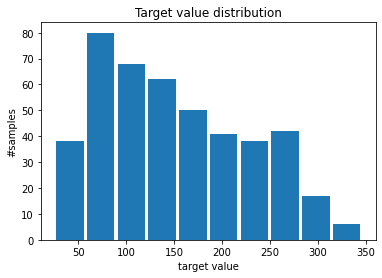

In [8]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [13]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [14]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

0.477

**Interpret model coefficients and intercept**

In [16]:
#Coefficient/Weight array
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [17]:
#Intercept of the linear model
np.round(reg.intercept_,3)

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

**Linear Regression Model Equation**

y_hat = 151.008 + (29.254)(Age) + (-261.706)(Sex) + (546.3)(bmi) + (388.398)(bp) + (-901.96)(s1) + (506.763)(s2) + (121.154)(s3) + (288.035)(s4) + (659.269)(s5) + (41.377)(s6)

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [20]:
#Check whether the intercept is set to 0 or determined by the linear regression model. If False, the intercept = 0.
reg.fit_intercept

True

In [23]:
#Names of features from the training data
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [24]:
#With L2 penalty
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [25]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [26]:
np.round(rg_reg.intercept_,3)

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [31]:
# Fit model
#With L1 penalty
Lasso = Lasso()

In [32]:
# Evaluate model performance
Lasso.fit(X_train, y_train)
np.round(Lasso.score(X_test, y_test), 3)

0.362

In [33]:
# Interpret model coefficients and intercept
np.round(Lasso.coef_,3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [34]:
np.round(Lasso.intercept_,3)

152.166

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [51]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows

row_names = dict([item for item in zip(range(12), list(reg.feature_names_in_) + ['intercept', 'score'])])

np.round(pd.DataFrame({'linear':list(reg.coef_) + [reg.intercept_, reg.score(X_test, y_test)],
             'ridge': list(rg_reg.coef_) + [rg_reg.intercept_, rg_reg.score(X_test, y_test)],
             'lasso': list(Lasso.coef_) + [Lasso.intercept_, Lasso.score(X_test, y_test)]}).rename(index=row_names), 3)

,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

* The Lasso regression model has more features with coefficients equal to 0, which yields sparsity within the model.
* Only 'bmi', 'bp', 's5' are considered in the Lasso model with non-zero coefficients
* In Lasso regression model, the absolute sum of the weights (L1 panelty) is added to the loss function, which shrink some of the coefficients toward 0. 
* All coefficients in the Ridge model are non-zero values due to the squared regularization term. 
* The linear regression model without regularization has the largest coefficients compared to regularized models.
* The intercepts of three regression models are similar. Regularization only affects the coefficients.
* The linear model have the large coefficients compared to Ridge and Lasso model, which may cause overfitting of the training data.
* Use the results from Lasso model for feature selections

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [52]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [53]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

**why do we do "fit_transform" on training data but only do "transform" on testing data?**
* The purpose of doing "fit_transform" on training data is to obtain the scaling parameters (mean and standard deviation).
* The purpose of doing “transfom" on testing data is to apply the scaling to the testing data.
* We don't use "fit_transform" on testing data because we don't need to learn from the pattern of testing data.

In [54]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
np.round(poly2_score,3)

0.413

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [55]:
# generate the new polynomial feature matrix for the training data
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

In [56]:
# generate the new polynomial feature matrix for the testing data 
X_test_poly1 = poly1.transform(X_test)
X_test_poly1.shape

(133, 11)

In [57]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 
poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
np.round(poly1_score,3)

0.477

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [58]:
# generate the new polynomial feature matrix for the training data
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

In [59]:
# generate the new polynomial feature matrix for the testing data 
X_test_poly3 = poly3.transform(X_test)
X_test_poly3.shape

(133, 286)

In [60]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 
poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
np.round(poly3_score,3)

-91.718

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [63]:
row_names = dict([item for item in zip(range(2), ['intercept', 'score'])])

np.round(pd.DataFrame({'linear': [reg.intercept_, reg.score(X_test, y_test)],
             'poly_d1': [poly1_reg.intercept_, poly1_reg.score(X_test_poly1, y_test)],
             'poly_d2': [poly2_reg.intercept_, poly2_reg.score(X_test_poly2, y_test)],
             'poly_d3': [poly3_reg.intercept_, poly3_reg.score(X_test_poly3, y_test)]}).rename(index=row_names), 3)

,linear,poly_d1,poly_d2,poly_d3
intercept,151.008,151.008,-360.919,-2.371637e+16
score,0.477,0.477,0.413,-9.171800e+01


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

* Linear and poly_d1 models have identical intercepts and scores. Polynomial model with degree = 1 is simply a linear model
* poly_d2 model has a lower score and a large negative value. Adding one degree to the model does not help in improving model's performance because the data probably does not have a quadratic relationship.
* poly_d3 model has a extremely large intercept and low negative score. Polynomial with degree of 3 is too complex to fit the data.
* poly_d2 and poly_d3 models are more prone to overfitting because higher-order polynomial models tend to capture the noise and random variations in the training data. 

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

* Age, bmi, bp, s2 (low-density lipoproteins), s3 (high-density lipoproteins), s5 (possibly log of serum triglycerides level), and s6 (blood sugar level) contributed positively to diabetes.
* Sex and s1 (total serum cholesterol) contributed negatively to diabetes. 
* Lasso model can be used for feature selections. The most significant factors identified with L1 penalty were bmi, bp, and s5. 
* The factors that contributed the least to diabetes were age, sex, s1, s2, s3, s4, and s6, as their coefficients were shrunk to smller numbers and even zero after introducing the L1 and L2 regularization terms.
* These statistical correlations make sense from biological perspective. High BMI and Higher blood pressure are the well-known risk indicators of diabates. Also, elevated triglycerides level are common in diabetes patients since the insulin resistance (where the body is unable to take up glucose for energy) causes patients to break downn fats for the use of energy. Therefore, the level of fat (triglycerides) is higher for diabetes patients. 

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [66]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
# please change to your file path
df_data = pickle.load(open('./banknote_authentication_dataframe.pickle','rb'))

### Basic dataset exploration

In [68]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [69]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [70]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [71]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [72]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [73]:
clf.score(X_test, y_test)

0.9878640776699029

In [74]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [75]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [76]:
#solver = ‘saga', penalty = 'elasticnet', C=2.0
clf1 = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', C=2.0).fit(X_train, y_train)

In [77]:
clf1.score(X_test, y_test)

0.9878640776699029

In [78]:
clf1.predict(X_test[:3])

array([0., 0., 0.])

In [79]:
np.round(clf1.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.978, 0.022],
       [0.994, 0.006]])

### Compare model performance with different c values and different penalties

In [170]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
     
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    ### Your code starts from here 
    
    classifier = []
    df = []
    
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        comp = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=c, penalty=p)
        comp.fit(X_train, y_train)
        
        coef = comp.coef_
        
        score = comp.score(X_test, y_test)
        min_coef = np.min(coef)
        max_coef = np.max(coef)
        average_coef = np.mean(np.abs(coef))
        zero_coef = np.sum(coef == 0)
        
        df.append({"c":c, "min" : min_coef, "max" : max_coef, 
                        "mean_abs": average_coef, "n_zero": zero_coef, 
                        "test_score": score})
        
        classifier.append(comp)
        
    df = np.round(pd.DataFrame(df), 3)
          
    return classifier, df
    

In [171]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.357,-0.074,0.190,0,0.922
1,0.010,-0.861,-0.173,0.485,0,0.973
2,0.100,-1.581,-0.163,0.915,0,0.988
3,1.000,-2.835,-0.166,1.645,0,0.988
4,10.000,-5.171,-0.290,2.937,0,0.988
5,100.000,-7.648,-0.438,4.297,0,0.990


In [172]:
l2_clfs

[LogisticRegression(C=0.001, max_iter=1000, random_state=42, solver='liblinear'),
 LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear'),
 LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear'),
 LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear'),
 LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear'),
 LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')]

In [167]:
# running example
l1_clfs, c_effect_l1, coef = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.042,0.000,0.010,3,0.624
1,0.010,-0.807,0.000,0.328,1,0.917
2,0.100,-1.750,0.000,0.936,1,0.988
3,1.000,-3.838,-0.132,2.164,0,0.988
4,10.000,-7.110,-0.389,3.993,0,0.990
5,100.000,-8.196,-0.464,4.596,0,0.990


In [173]:
l1_clfs

[LogisticRegression(C=0.001, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 LogisticRegression(C=0.01, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 LogisticRegression(C=100, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear')]

In [177]:
comp = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=0.1, penalty = 'l1')
comp.fit(X_train, y_train)       
coef = comp.coef_
coef
#See which features are significant using model with score = 0.988 (c=0.1)

array([[-1.75023572, -0.90859922, -1.08460709,  0.        ]])

**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

* C = Inverse of regularization strength. Smaller values specify stronger regularization

* Model with L1 penalty performed poorly when using c=0.001, and model with L2 penalty at c=0.001 also had the lowest test score.
* Strong regularzation (smaller c value) leads to lower model's performance and may lead to underfitting.
* The weaker the regularization, the higher the scores are. Typically, we would expect a lesser degree of regularization to lead to overfitting of the training data. However, overfitting is not occuring in this example.

* L1 penalty moved some coefficients to zero.
* With L1 penalty, as c value increased, the test score increased (Large difference between c = 0.001 and c = 0.010) and the numbers of zero coefficients decreased. 
* L2 penalty did not push any coefficients to zero.
* With L2 penalty, as c value increased, the test score gradually increased, which indicated model with L2 penalty would have a stable performance.
* As c value reached to 0.100, the scores of both L1 and L2 almost became the same. (0.988 ~ 0.990)

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

* The models' performance show high accruacy with moderate level of regularization. 
* Utilizing L1 regularization for feature selections, variance, skewness, and curtosis are significant features in identifying genuine and forges banknote.
* Entropy may not be significant becasuse both genuine and forged banknote are showing a similar amount of information, which makes entropy not as helpful as the other features in distinguishing real or fake banknote. 

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

* I found that the application and impact of L1 and L2 regularizations interesting, especially how they influenced feature selection and model complexity. 